# Process discriminator

In [1]:
import base

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import process_discriminator

## Generate paths

 We will generate Geometric Brownian Motions. We define three sets, `set1`, `set2` and  `set3`. `set1` and `set3` come from the same distribution and `set2` is not.

In [2]:
def generate(mu, sigma, n_points=100):
    """Generate GBM."""
    
    dt = 1 / np.sqrt(n_points)
    
    timeline = np.linspace(0, 1, n_points)
    bm = dt * np.r_[0., np.random.randn(n_points - 1).cumsum()]
    path = np.exp((mu - sigma ** 2 / 2.) * timeline + sigma * bm)
    
    return np.c_[timeline, path]    

100%|██████████| 5000/5000 [00:00<00:00, 11593.48it/s]


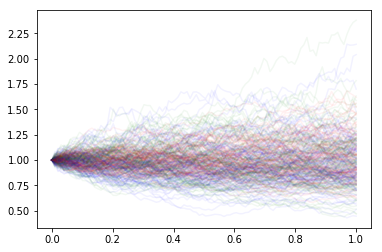

In [3]:
set1 = [generate(mu=0.02, sigma=0.3) for _ in tqdm(range(5000))]
set2 = [generate(mu=0.02, sigma=0.2) for _ in tqdm(range(5000))]
set3 = [generate(mu=0.02, sigma=0.3) for _ in tqdm(range(5000))]

for path1, path2, path3 in zip(set1[:100], set2[:100], set3[:100]):
    plt.plot(*path1.T, "b", alpha=0.05)
    plt.plot(*path2.T, "r", alpha=0.05)
    plt.plot(*path3.T, "g", alpha=0.05)

## Apply test

We will now apply the statistical test. We fix the confidence level to 99%.

In [5]:
result = process_discriminator.test(set1, set2, order=3, confidence_level=0.99)
print("Do set1 and set2 come from DIFFERENT distributions? {}".format(result))

Computing signatures of population 2: 100%|██████████| 5000/5000 [00:00<00:00, 9655.83it/s]


Do set1 and set2 come from DIFFERENT distributions? True


In [6]:
result = process_discriminator.test(set1, set3, order=3, confidence_level=0.99)
print("Do set1 and set3 come from DIFFERENT distributions? {}".format(result))

Computing signatures of population 2: 100%|██████████| 5000/5000 [00:00<00:00, 21145.83it/s]


Do set1 and set3 come from DIFFERENT distributions? False
